## Analisis Data dengan NER

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Praktikkum Kuliah/PraktikumEP')

In [3]:
data = pd.read_csv('output_merge.csv', header=0)
data = data.drop(['Unnamed: 0', '_merge'], axis = 1)
data

,user_id,name,user,location,id,text,date
0,1339408363055054853,Sekolah Official,OfficialSekolah,NaN,1380465126600400897,Akibat dari semakin berkembangnya teknologi sa...,2021-04-09 10:18:28
1,87901624,JakTvOfficial,JaktvCom,"Jakarta, Indonesia",1380463964035837960,"Sobat Jak, semoga kita semua bisa segera menda...",2021-04-09 10:13:51
2,3231776798,Berita Covid,beritacovid,NaN,1380427372189646848,#Cerita Pejuang Tes COVID Sulitnya Cari PCR Mu...,2021-04-09 07:48:27
3,1339408363055054853,Sekolah Official,OfficialSekolah,NaN,1380425822918438912,Kita sebagai guru harus bisa mengetahui karakt...,2021-04-09 07:42:17
4,1366400664960573441,holopiscom,holopiscom,"Jakarta Capital Region, Indone",1380411002286534669,"Waspada Virus Covid 19 Kembali Bermutasi, Kali...",2021-04-09 06:43:24
...,...,...,...,...,...,...,...
212,712276389286686721,Rakyat Merdeka,RakyatMerdeka99,"Graha Pena, Kebayoran Lama 12",1377829175684292611,"Manut Aturan Pusat, Gibran Larang ASN Solo Mud...",2021-04-02 03:44:08
213,712276389286686721,Rakyat Merdeka,RakyatMerdeka99,"Graha Pena, Kebayoran Lama 12",1377828730219851779,5 Ribu Pegawai KAI Ikuti Program Vaksinasi Ber...,2021-04-02 03:42:22
214,750551587,educratsweb,educratsweb,india,1377824329509965828,#Surge in Delhi Covid cases due to... CM Arvin...,2021-04-02 03:24:53
215,944180887171743745,iNews.id,inewsdotid,"Jakarta, Indonesia",1377806065723600903,Proses belajar tatap muka rencananya akan kemb...,2021-04-02 02:12:19


### EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
user_id     217 non-null int64
name        217 non-null object
user        217 non-null object
location    146 non-null object
id          217 non-null int64
text        217 non-null object
date        217 non-null object
dtypes: int64(2), object(5)
memory usage: 12.0+ KB


In [5]:
data.describe()

,user_id,id
count,2.170000e+02,2.170000e+02
mean,4.522558e+17,1.379283e+18
std,4.846583e+17,8.138976e+14
min,4.385674e+07,1.377599e+18
25%,3.231777e+09,1.378591e+18
50%,7.122764e+17,1.379340e+18
75%,7.122764e+17,1.379997e+18
max,1.378446e+18,1.380465e+18


In [6]:
print(data.columns, data.shape)

Index(['user_id', 'name', 'user', 'location', 'id', 'text', 'date'], dtype='object') (217, 7)


In [7]:
print(data.loc[101]['text'])

Lhokseumawe dan Pidie Jaya Masuk Zona Kuning Covid-19
 #Covid-19 #petazonasi #...
https://t.co/QZAYhy2Cbs


### Pre-Process Data

In [8]:
data_clean = data

In [9]:
data_clean['text']=data_clean['text'].apply(str)

In [10]:
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
user_id     217 non-null int64
name        217 non-null object
user        217 non-null object
location    146 non-null object
id          217 non-null int64
text        217 non-null object
date        217 non-null object
dtypes: int64(2), object(5)
memory usage: 12.0+ KB
None


In [11]:
#Hapus '\\n', 'RT', + Downcase
data_clean['tweet_clean'] = data_clean['text'].str.replace('\\n', ' ', regex=False)
data_clean['tweet_clean'] = data_clean['text'].str.replace('\n', ' ', regex=False)
data_clean['tweet_clean'] = data_clean['tweet_clean'].str.replace('RT', '', regex=False)
data_clean['tweet_clean'] = data_clean['tweet_clean'].str.replace('&amp;', 'dan', regex=False)
data_clean['tweet_clean'] = data_clean['tweet_clean'].str.lower()

#Hapus punct sign
import string
sign_list = list(string.punctuation)
for sign in sign_list :
    data_clean['tweet_clean'] = data_clean['tweet_clean'].str.replace(sign, ' ',regex=False)

#Hapus extra space
data_clean['tweet_clean'] = data_clean['tweet_clean'].str.replace('   ', ' ')
data_clean['tweet_clean'] = data_clean['tweet_clean'].str.replace('  ', ' ')

In [12]:
data_clean['tweet_clean']

0      akibat dari semakin berkembangnya teknologi sa...
1      sobat jak semoga kita semua bisa segera mendap...
2       cerita pejuang tes covid sulitnya cari pcr mu...
3      kita sebagai guru harus bisa mengetahui karakt...
4      waspada virus covid 19 kembali bermutasi kali ...
                             ...                        
212    manut aturan pusat gibran larang asn solo mudi...
213    5 ribu pegawai kai ikuti program vaksinasi ber...
214     surge in delhi covid cases due to cm arvind k...
215    proses belajar tatap muka rencananya akan kemb...
216    menkes ramal bisnis obat obatan bakal makin mo...
Name: tweet_clean, Length: 217, dtype: object

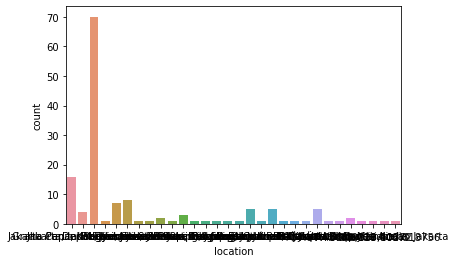

In [13]:
sns.countplot(x='location',data=data_clean)

In [14]:
import re
processed_text = re.sub(r'(@|https?)\S+', '', str(data_clean['tweet_clean']))
processed_text = " ".join(processed_text.split())
print(processed_text)

0 akibat dari semakin berkembangnya teknologi sa... 1 sobat jak semoga kita semua bisa segera mendap... 2 cerita pejuang tes covid sulitnya cari pcr mu... 3 kita sebagai guru harus bisa mengetahui karakt... 4 waspada virus covid 19 kembali bermutasi kali ... ... 212 manut aturan pusat gibran larang asn solo mudi... 213 5 ribu pegawai kai ikuti program vaksinasi ber... 214 surge in delhi covid cases due to cm arvind k... 215 proses belajar tatap muka rencananya akan kemb... 216 menkes ramal bisnis obat obatan bakal makin mo... Name: tweet_clean, Length: 217, dtype: object


### Algoritma NER

In [15]:
import pickle
import spacy
import random
from spacy.util import minibatch, compounding
from spacy import load, displacy

In [33]:
# load datasets 

with open('ner_spacy_fmt_datasets.pickle', 'rb') as f:
    ner_spacy_fmt_datasets = pickle.load(f)

In [34]:
nlp=spacy.blank("id")

In [35]:
nlp.add_pipe(nlp.create_pipe('ner'))

In [36]:
nlp.begin_training()

In [22]:
import random
from spacy.util import minibatch, compounding

In [38]:
ner=nlp.get_pipe("ner")

In [40]:
for _, annotations in ner_spacy_fmt_datasets:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])
        break

In [41]:
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [43]:
# TRAINING THE MODEL
with nlp.disable_pipes(*unaffected_pipes):

  # Training for 30 iterations
  for iteration in range(30):

    # shuufling examples  before every iteration
    random.shuffle(ner_spacy_fmt_datasets)
    losses = {}
    # batch up the examples using spaCy's minibatch
    batches = minibatch(ner_spacy_fmt_datasets, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        texts, annotations = zip(*batch)
        nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,  # dropout - make it harder to memorise data
                    losses=losses,
                )
    
    print("Losses at iteration {}".format(iteration), losses)

Losses at iteration 0 {'ner': 46452.2522604903}
Losses at iteration 1 {'ner': 44879.89674696838}
Losses at iteration 2 {'ner': 44324.21053980708}
Losses at iteration 3 {'ner': 43933.20043266045}
Losses at iteration 4 {'ner': 43976.719662253265}
Losses at iteration 5 {'ner': 43897.13656332165}
Losses at iteration 6 {'ner': 43778.6270529789}
Losses at iteration 7 {'ner': 43816.31540535112}
Losses at iteration 8 {'ner': 43614.572494188884}
Losses at iteration 9 {'ner': 43530.02296193094}
Losses at iteration 10 {'ner': 43664.316823002155}
Losses at iteration 11 {'ner': 43538.31502723017}
Losses at iteration 12 {'ner': 43402.34262743464}
Losses at iteration 13 {'ner': 43197.07566837326}
Losses at iteration 14 {'ner': 43429.5839668657}
Losses at iteration 15 {'ner': 42986.58963338834}
Losses at iteration 16 {'ner': 43501.52328784145}
Losses at iteration 17 {'ner': 42826.535700298584}
Losses at iteration 18 {'ner': 42706.6525879113}
Losses at iteration 19 {'ner': 42824.16247483752}
Losses at 

In [96]:
# test 
doc = nlp("Salam santun @BNPB_Indonesia @aw3126 @KawalCOVID19 Daerah Sebaran Kasus Positif CoViD-19 Indonesia Per tgl 02 Apr 2021, pukul 12.00WIB 34 Propinsi telah terdampak penyebaran Virus CoViD-19 #coronavirus #covid-19 #coronavirusindonesia #coronaindonesia #wabahcorona #covid19")
print(doc.ents)
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

(@KawalCOVID19 Daerah, 12.00WIB 34 Propinsi)
Entities [('@KawalCOVID19 Daerah', 'PERSON'), ('12.00WIB 34 Propinsi', 'QUANTITY')]


In [97]:
# save model 
from pathlib import Path

output_dir = Path('nlp_id_checkpoint_2021_04_09')
nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to nlp_id_checkpoint_2021_04_09


## Testing with the Clean Tweet #COVID

In [16]:
# load existing model 
output_dir = 'nlp_id_checkpoint_2021_04_09'
print("Loading from", output_dir)
nlp_updated = spacy.load(output_dir)

Loading from nlp_id_checkpoint_2021_04_09


In [18]:
doc = nlp_updated("#Pasokan kurang, negara-negara di dunia berebut vaksin melawan Covid-19 - Internasional Kontan #Covid #Covid19 https://t.co/dYYiKNIgVo." )
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

Entities []


In [19]:
displacy.render(doc, style="ent")

C:\ProgramData\Anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [20]:
doc2 = nlp_updated("Salam santun @BNPB_Indonesia @aw3126 @KawalCOVID19 Daerah Sebaran Kasus Positif CoViD-19 Indonesia Per tgl 02 Apr 2021, pukul 12.00WIB 34 Propinsi telah terdampak penyebaran Virus CoViD-19 #coronavirus #covid-19 #coronavirusindonesia #coronaindonesia #wabahcorona #covid19" )
print("Entities", [(ent.text, ent.label_) for ent in doc2.ents])

Entities [('@KawalCOVID19 Daerah', 'PERSON'), ('12.00WIB 34 Propinsi', 'QUANTITY')]


In [21]:
list_hasil=[]
for i in data_clean['tweet_clean']:
    doc = nlp_updated(i)
    list_hasil.append([(ent.text, ent.label_) for ent in doc.ents])

In [22]:
list_hasil

[[],
 [],
 [],
 [],
 [],
 [],
 [('19 covid 19 covid', 'QUANTITY')],
 [],
 [],
 [('19 indonesia', 'QUANTITY'),
  ('08 apr 2021', 'QUANTITY'),
  ('12 00wib 34 propinsi', 'QUANTITY'),
  ('19 coronavirus', 'QUANTITY'),
  ('19 coronavirusindonesia', 'QUANTITY')],
 [],
 [],
 [('7 persen', 'QUANTITY'), ('19 covid 19 covid', 'QUANTITY')],
 [('133 juta', 'QUANTITY'), ('20 besar', 'QUANTITY')],
 [('19 covid 19 covid', 'QUANTITY')],
 [('19 indonesia', 'QUANTITY'),
  ('12 00wib 34 propinsi', 'QUANTITY'),
  ('19 coronavirus', 'QUANTITY'),
  ('19 coronavirusindonesia', 'QUANTITY')],
 [('40 orang', 'QUANTITY'), ('19 cnn', 'QUANTITY')],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('8 dunia', 'QUANTITY')],
 [('19 indonesia', 'QUANTITY'),
  ('06 apr 2021', 'QUANTITY'),
  ('12 00wib 34 propinsi', 'QUANTITY'),
  ('19 coronavirus', 'QUANTITY'),
  ('19 coronavirusindonesia', 'QUANTITY')],
 [],
 [],
 [],
 [],
 [('170 negara', 'QUANTITY'),
  ('150 tahun', 'QUANTITY'),
  ('19 covid 19 covid', 'QUANTITY')],
 [('9

In [24]:
options = {'ents': ['QUANTITY', 'PERSON', 'LOCATION']}

In [25]:
displacy.render(doc2, style="ent", options = options)

### Convert to Output Ner

In [26]:
list_hasil_df = pd.DataFrame(list_hasil)
list_hasil_df.to_csv('output_ner.csv')

__Only Processed Text__

In [27]:
#cleaned no mention and url
processed_text

'0 akibat dari semakin berkembangnya teknologi sa... 1 sobat jak semoga kita semua bisa segera mendap... 2 cerita pejuang tes covid sulitnya cari pcr mu... 3 kita sebagai guru harus bisa mengetahui karakt... 4 waspada virus covid 19 kembali bermutasi kali ... ... 212 manut aturan pusat gibran larang asn solo mudi... 213 5 ribu pegawai kai ikuti program vaksinasi ber... 214 surge in delhi covid cases due to cm arvind k... 215 proses belajar tatap muka rencananya akan kemb... 216 menkes ramal bisnis obat obatan bakal makin mo... Name: tweet_clean, Length: 217, dtype: object'

In [28]:
doc = nlp_updated(processed_text)

In [29]:
displacy.render(doc, style="ent", options = options)

In [ ]:
displacy.serve(doc, style='ent', options=options)

C:\ProgramData\Anaconda3\lib\site-packages\spacy\displacy\__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

